In [1]:

import numpy as np

import salvus.namespace as sn

import salvus.mesh
import salvus.mesh.layered_meshing as lm
from my_code.utilities import *
from pathlib import Path
import matplotlib.pyplot as plt

# Directories in WSL
PROJECT_DIR = '/home/oliver/workspace/Salvus/elastic_model/anisotropic/Project'
IMAGE_DIR = '/home/oliver/workspace/Salvus/elastic_model/anisotropic/image'
DATA_DIR = '/home/oliver/workspace/Salvus/elastic_model/anisotropic/data'


# Directories in Windows
PROJECT_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/Project'
DATA_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/data'
IMAGE_DIR_WIN = '/mnt/d/Salvus_project/elastic_model/anisotropic/image'

PROJECT_NAME = f"tomography_heterogeneous_circle_phi_src_16_smooth_0mm_roi_7mm"


p =  sn.Project(path=Path(PROJECT_DIR_WIN, PROJECT_NAME))

--> Server: 'https://l.mondaic.com/licensing_server', User: 'bristol.support', Group: 'UniversityOfBristol'.
--> Negotiating 1 license instance(s) for 'SalvusMesh' [license version 1.0.0] for 1 seconds ...
--> Success! [Total duration: 0.55 seconds]


Accordion(children=(HTML(value='\n                <head>\n                <style>\n                td {\n     …

In [2]:
event_data = p.waveforms.get("sc_mesh_homogeneous_scatters", p.events.list()[0])[0]

# time, u_z = event_data.get_data_cube(receiver_field='displacement',component='Z')



In [153]:
# # Lastly we perform two iterations, and have a look at the results.
# for i in range(10):
    
#     p.inversions.iterate(
#         inverse_problem_configuration="inversion_L2",
#         timeout_in_seconds=360,
#         ping_interval_in_seconds=100,
#         delete_disposable_files="all",
#     )
    


In [154]:
p.viz.nb.inversion(inverse_problem_configuration="inversion_L2")

In [3]:
# inverted mesh 
mesh = p.inversions.get_model(inverse_problem_configuration="inversion_L2", iteration_id=9)
mesh.attach_field('v_p', mesh.element_nodal_fields['VP']*5000+5000)
# init mesh
init_mesh = p.simulations.get_mesh(simulation_configuration='sc_mesh_homogeneous_scatters')
rmse = np.sqrt(np.mean((mesh.element_nodal_fields['v_p'] - init_mesh.elemental_fields['VP'])**2))
rmse

110.99025

{'FemMassMatrix': array([[1.7361111e-07, 3.4722223e-07, 3.4722223e-07, 6.9444445e-07],
        [3.4722223e-07, 3.4722223e-07, 6.9444445e-07, 6.9444445e-07],
        [3.4722223e-07, 3.4722223e-07, 6.9444445e-07, 6.9444445e-07],
        ...,
        [6.9444445e-07, 6.9444445e-07, 3.4722223e-07, 3.4722223e-07],
        [6.9444445e-07, 6.9444445e-07, 3.4722223e-07, 3.4722223e-07],
        [6.9444445e-07, 3.4722223e-07, 3.4722223e-07, 1.7361111e-07]],
       dtype=float32),
 'VP': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 'Valence': array([[1., 2., 2., 4.],
        [2., 2., 4., 4.],
        [2., 2., 4., 4.],
        ...,
        [4., 4., 2., 2.],
        [4., 4., 2., 2.],
        [4., 2., 2., 1.]], dtype=float32),
 'v_p': array([[5000., 5000., 5000., 5000.],
        [5000., 5000., 5000., 5000.],
        [5000., 5000., 5000., 5000.],
        ...,
   

In [157]:

p.viz.nb.simulation_setup(
    simulation_configuration='sc_mesh_homogeneous_scatters',
    events=p.events.list(),
)


In [158]:

# # Get the connectivity array (which maps elements to global nodes)
# connectivity = init_mesh.connectivity  # shape (940, 4), each row = global node indices of one element

# # Initialize nodal field and count arrays
# n_nodes = init_mesh.number_of_nodes
# nodal_values = np.zeros(n_nodes)
# nodal_counts = np.zeros(n_nodes)

# # Loop through elements and distribute values to nodes
# for element_idx in range(connectivity.shape[0]):
#     for local_node_idx in range(4):  # assuming quad elements
#         global_node_idx = connectivity[element_idx, local_node_idx]
#         nodal_values[global_node_idx] += init_mesh.element_nodal_fields['VP'][element_idx, local_node_idx]
#         nodal_counts[global_node_idx] += 1

# # Avoid divide by zero
# nodal_counts[nodal_counts == 0] = 1
# true_nodal_field = nodal_values / nodal_counts  # now shape (n_nodes,)

# import matplotlib.pyplot as plt
# import numpy as np

# # Get nodal coordinates
# coordinates = init_mesh.points  # shape: (n_nodes, 2) if 2D

# # If you've already computed `true_nodal_field`:
# x = coordinates[:, 0]
# y = coordinates[:, 1]
# field = true_nodal_field

# # Plot
# plt.figure(figsize=(8, 6))
# sc = plt.scatter(x, y, c=field, cmap='viridis', s=10)
# plt.colorbar(sc, label='v_p (m/s)')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('2D Plot of Nodal Field v_p')
# plt.axis('equal')
# plt.tight_layout()
# plt.show()


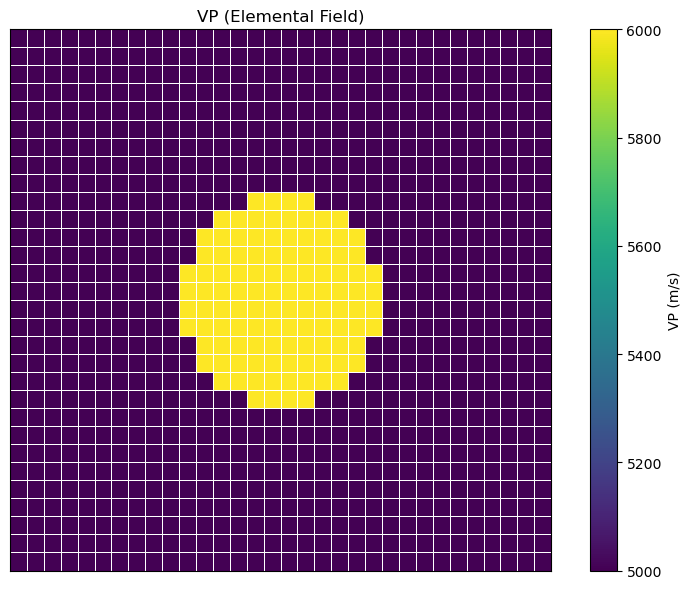

In [159]:

import matplotlib.pyplot as plt
import numpy as np

nx, ny = 32, 30
vp_field_init = np.mean(init_mesh.elemental_fields['VP'], axis=1)
vp_grid_init = vp_field_init.reshape((ny, nx))

x_edges = np.linspace(0, 1, nx+1)
y_edges = np.linspace(0, 1, ny+1)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plot with thicker lines
pc = ax.pcolormesh(x_edges, y_edges, vp_grid_init, cmap="viridis",
                   edgecolors='white', linewidth=0.5, rasterized=True)  # Thicker grid lines

# Colorbar
cbar = plt.colorbar(pc, ax=ax)
cbar.set_label("VP (m/s)")

# Hide all ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Keep square aspect and clean layout
ax.set_aspect("equal")
plt.title("VP (Elemental Field)")
plt.tight_layout()
plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'_init.png'))

plt.show()


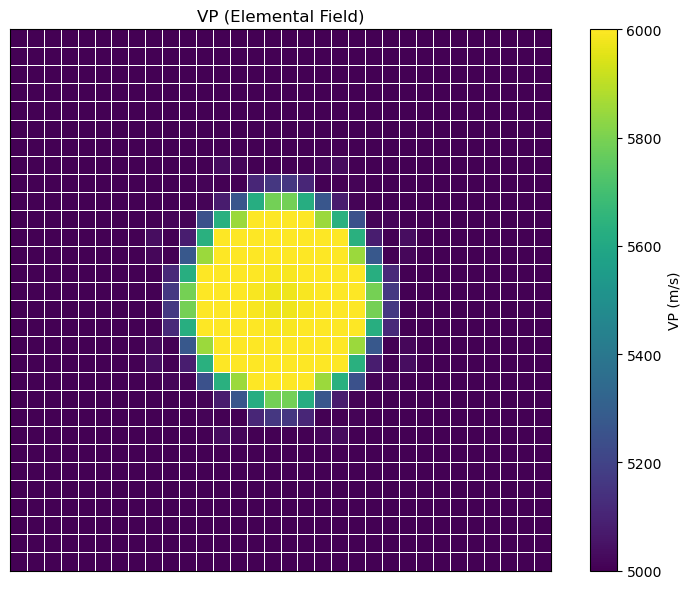

In [160]:


nx, ny = 32, 30
vp_field = np.mean(mesh.elemental_fields['v_p'], axis=1)
vp_grid = vp_field.reshape((ny, nx))

x_edges = np.linspace(0, 1, nx+1)
y_edges = np.linspace(0, 1, ny+1)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plot with thicker lines
pc = ax.pcolormesh(x_edges, y_edges, vp_grid, cmap="viridis",
                   edgecolors='white', linewidth=0.5, rasterized=True)  # Thicker grid lines

# Colorbar
cbar = plt.colorbar(pc, ax=ax)
cbar.set_label("VP (m/s)")

# Hide all ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
pc.set_clim(vmin=5000, vmax=6000)  # Set colorbar limits

# Keep square aspect and clean layout
ax.set_aspect("equal")
plt.title("VP (Elemental Field)")
plt.tight_layout()
plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'_inverted.png'))
plt.show()


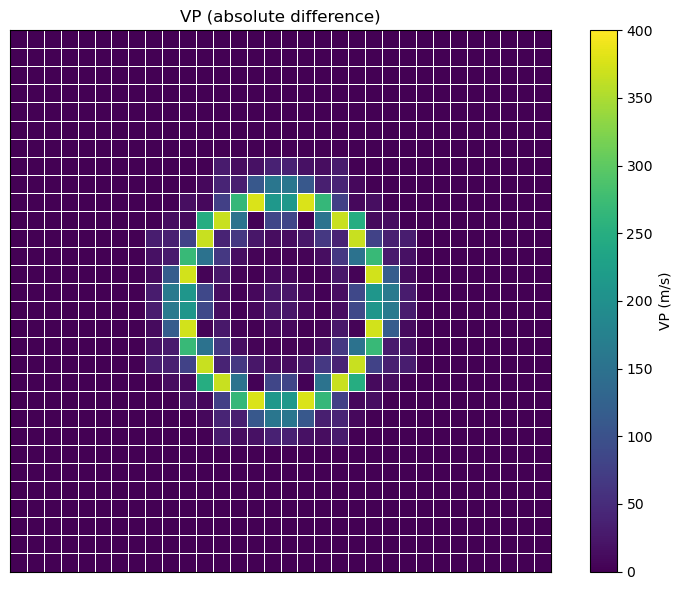

In [161]:
vp_diff = abs(vp_grid - vp_grid_init)

x_edges = np.linspace(0, 1, nx+1)
y_edges = np.linspace(0, 1, ny+1)

# Create high-resolution figure
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# Plot with thicker lines
pc = ax.pcolormesh(x_edges, y_edges, vp_diff, cmap="viridis",
                   edgecolors='white', linewidth=0.5, rasterized=True)  # Thicker grid lines

# Colorbar
cbar = plt.colorbar(pc, ax=ax)
cbar.set_label("VP (m/s)")

# Hide all ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
pc.set_clim(vmin=0, vmax=400)  # Set colorbar limits

# Keep square aspect and clean layoutplt
ax.set_aspect("equal")
plt.title("VP (absolute difference)")
plt.tight_layout()
plt.savefig(Path(IMAGE_DIR_WIN, PROJECT_NAME + fr'_abs_diff.png'))
plt.show()


In [162]:
rmse = np.sqrt(np.mean((vp_grid - vp_grid_init)**2))
rmse

65.0541

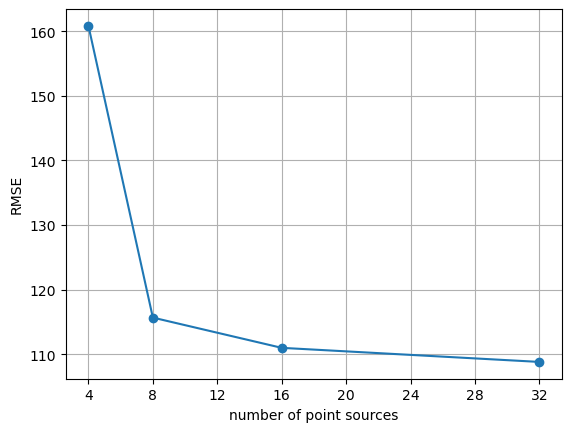

In [175]:
rmse_ls = [160.82, 115.67, 110.99, 108.81]
x_ls = [4, 8, 16, 32]

plt.plot(x_ls, rmse_ls, marker='o')
plt.xlabel('number of point sources')
plt.ylabel('RMSE')
plt.grid(True)
plt.xticks(range(4, 33, 4))  # Ticks at 4, 8, 12, 16, 20, 24, 28, 32
plt.savefig(Path(IMAGE_DIR_WIN,  fr'elemental_field_rmse.png'))
